## Observations and Insights 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Checking data
# mouse_metadata.head()
# study_results.head()

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on=('Mouse ID'))

# # Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice.
merged_df['Mouse ID'].count

<bound method Series.count of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object>

In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 



In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=['Mouse ID'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [17]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].count

<bound method Series.count of 0       k403
10      s185
20      x401
30      m601
40      g791
        ... 
1858    z314
1860    z435
1863    z581
1873    z795
1883    z969
Name: Mouse ID, Length: 249, dtype: object>

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_stats = pd.DataFrame(merged_df.groupby("Drug Regimen").count())
sum_stats

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [19]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
sum_stats['Mean'] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
sum_stats['Median'] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
sum_stats['Standard Deviation'] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
sum_stats['Variance'] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
sum_stats['SEM'] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
                                 
# Assemble the resulting series into a single summary dataframe.
sum_stats = sum_stats[['Mouse ID', 'Mean', 'Median', 'Standard Deviation', 'Variance', 'SEM']]

#Rename Id because it's a count of trials
sum_stats = sum_stats.rename(columns = {"Mouse ID" : "# of Mice"})
sum_stats

,# of Mice,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,161,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

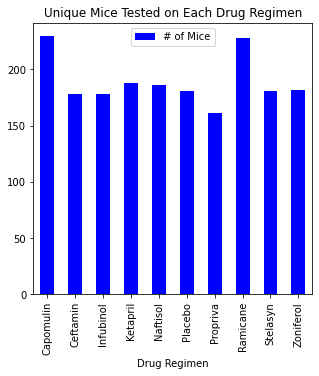

In [29]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice_bar = sum_stats[['# of Mice']]
unique_mice_bar.plot(kind='bar', figsize=(5,5), color='b', legend=True)
plt.title("Unique Mice Tested on Each Drug Regimen")
plt.show()

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
sum_stats['# of Mice'].plt.bar(x, height, width=1.0, bottom=0, align = 'center')
plt.show()


AttributeError: 'Series' object has no attribute 'plt'

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique_mice_pie = clean_df[['Sex']]
unique_mice_pie.plot(kind='pie', explode=explode, labels=clean_df.index.values, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, legend=True)
plt.title("Unique Mice Tested on Each Drug Regimen")
plt.show()


NameError: name 'explode' is not defined

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
